In [1]:
import json
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import requests

url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/C77C2F92664E/2022-11-18%2008:30:00.000/2022-11-18%2015:00:00.000"

reponse = requests.get(url)
print(reponse)
contenu = reponse.json()
print(type(contenu))
contenu['resultat']

<Response [200]>
<class 'dict'>


[{'timestamp': '2022-11-18 14:59:59.979',
  'macModule': 'C45BBE39870E',
  'rssi': -52},
 {'timestamp': '2022-11-18 14:59:52.206',
  'macModule': 'C45BBE39870E',
  'rssi': -65},
 {'timestamp': '2022-11-18 14:59:42.509',
  'macModule': 'C45BBE39870E',
  'rssi': -65},
 {'timestamp': '2022-11-18 14:59:41.501',
  'macModule': 'A8032A31204A',
  'rssi': -79},
 {'timestamp': '2022-11-18 14:59:32.819',
  'macModule': 'C45BBE39870E',
  'rssi': -63},
 {'timestamp': '2022-11-18 14:59:26.008',
  'macModule': 'A8032A31204A',
  'rssi': -76},
 {'timestamp': '2022-11-18 14:59:23.090',
  'macModule': 'C45BBE39870E',
  'rssi': -65},
 {'timestamp': '2022-11-18 14:59:18.342',
  'macModule': 'A8032A31204A',
  'rssi': -79},
 {'timestamp': '2022-11-18 14:59:10.603',
  'macModule': 'A8032A31204A',
  'rssi': -80},
 {'timestamp': '2022-11-18 14:59:09.494',
  'macModule': 'C45BBE39870E',
  'rssi': -71},
 {'timestamp': '2022-11-18 14:59:03.612',
  'macModule': 'C45BBE39870E',
  'rssi': -67},
 {'timestamp': '2022-

In [3]:
df_2 = pd.DataFrame(contenu['resultat'])
df_2["macModule"].unique()
df_2["date"] = pd.to_datetime(df_2["timestamp"])
df_2 = df_2.sort_values('timestamp').reset_index()
df_2['Time'] = pd.to_datetime(df_2['date']).dt.time
df_2['hourMinute'] = df_2.date.dt.hour.astype(str) + 'h' + df_2.date.dt.minute.astype(str)
df_2=df_2.drop(columns=["timestamp","date","Time","index"])

In [4]:
df_2

,macModule,rssi,hourMinute
0,C45BBE39870E,-77,8h33
1,C45BBE39870E,-60,8h33
2,A8032A31204A,-79,8h33
3,C45BBE39F4D6,-77,8h33
4,C45BBE39870E,-74,8h33
...,...,...,...
2991,C45BBE39870E,-63,14h59
2992,A8032A31204A,-79,14h59
2993,C45BBE39870E,-65,14h59
2994,C45BBE39870E,-65,14h59


In [11]:
df_2=df_2[df_2["macModule"].str.contains("C45BBE38FEAA|C45BBE39870E|C45BBE39F4D6|A8032A31204A")==False] 
df_2


,macModule,rssi,hourMinute
30,A8032A311FAA,-67,8h37
31,A8032A311FAA,-66,8h37
32,C45BBE39F9AE,-64,8h37
33,A8032A31204E,-69,8h38
34,C45BBE37B346,-79,8h38
...,...,...,...
2765,A8032A311FAA,-70,14h17
2767,A8032A311FAA,-79,14h17
2770,A8032A311FAA,-76,14h17
2968,A8032A311FAA,-80,14h58


In [12]:
df_2.to_csv('bd2.csv', index=False) 

In [13]:
df_2["macModule"].unique()

array(['A8032A311FAA', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE37B346',
       'C45BBE386952', 'C45BBE39F56A', 'C45BBE384CD2', 'C45BBE386362'],
      dtype=object)

In [14]:
my_map={'A8032A31204E':"A8032A31204E_29m", 'C45BBE37B346':"C45BBE37B346_52m", 'C45BBE39F9AE':"C45BBE39F9AE_13m", 'A8032A311FAA':"A8032A311FAA_4m",
       'C45BBE39F56A':"C45BBE39F56A_56m", 'C45BBE386952':"C45BBE386952_65m", 'C45BBE384CD2':"C45BBE384CD2_89m", 'C45BBE386362':"C45BBE386362_80m"}
df_2["macModule"]=df_2["macModule"].map(my_map)

In [15]:
df_2.to_csv(path_or_buf='cc.csv', decimal='.', sep= ',', index=False)

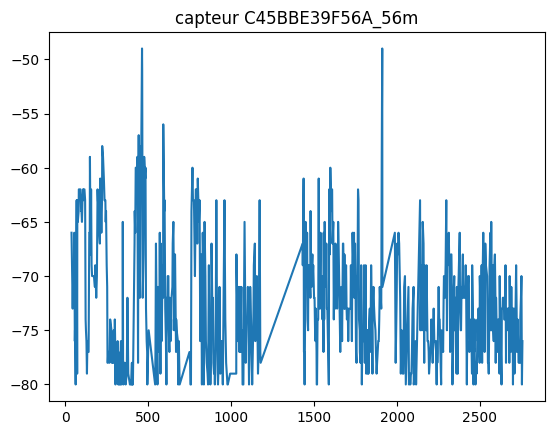

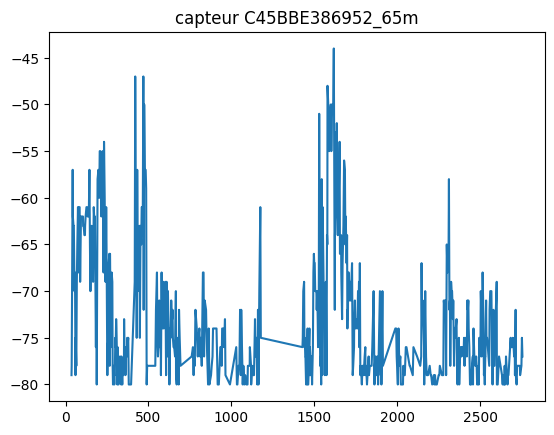

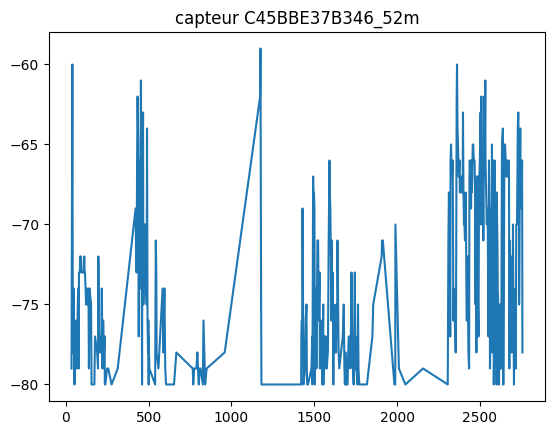

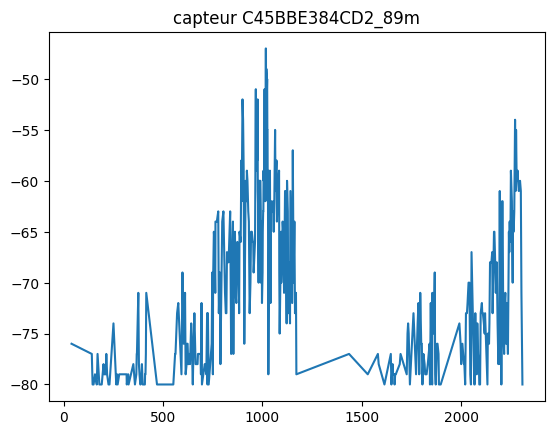

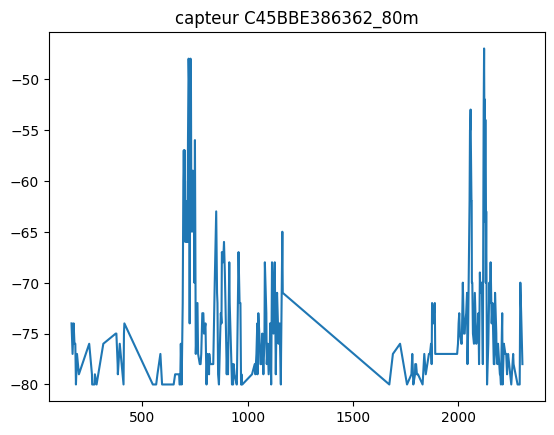

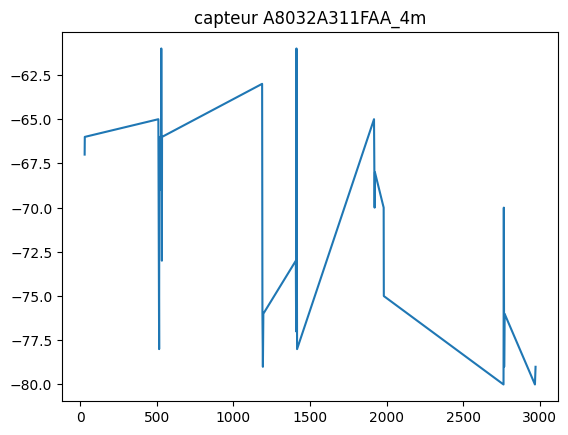

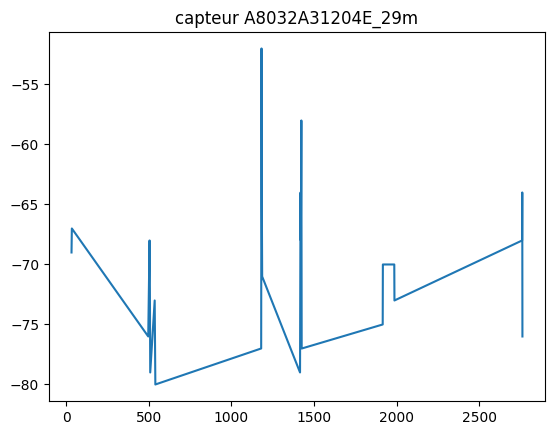

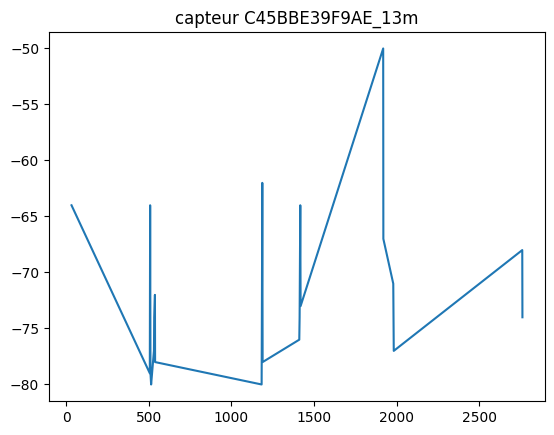

In [16]:
for mac in df_2.macModule.value_counts().keys().tolist():
    df_2[df_2.macModule == mac]['rssi'].plot()
    plt.title('capteur '+ mac)
    plt.show()

In [17]:
exp = pd.read_csv('18_11.csv')
df = df_2.merge(exp, left_on ='hourMinute', right_on='Time', how='left')
df=df.drop(columns=["hourMinute","Time"])

In [18]:
df.to_csv(path_or_buf='po.csv', decimal='.', sep= ',', index=False)

In [19]:
df.dropna()
df.dropna().reset_index(drop=True)

,macModule,rssi,Position
0,C45BBE37B346_52m,-78,62.0
1,C45BBE386952_65m,-69,62.0
2,C45BBE39F56A_56m,-63,62.0
3,C45BBE37B346_52m,-76,62.0
4,C45BBE386952_65m,-65,62.0
...,...,...,...
503,C45BBE39F56A_56m,-72,89.0
504,C45BBE386362_80m,-80,89.0
505,C45BBE39F56A_56m,-70,89.0
506,C45BBE384CD2_89m,-59,89.0


In [20]:
capteurs=df["macModule"].unique()
df_final={}
df1=pd.DataFrame()
positions=df["Position"].unique()
for p in positions:
    df_final[p]=pd.DataFrame()
    for c in capteurs:
       df1=df[df["Position"]==p]
       df_final[p][c]=pd.Series(df1[df1["macModule"]==c]["rssi"].values)

In [21]:
capteurs=df["macModule"].unique()
df_final2={}
df2=pd.DataFrame()
positions=df["Position"].unique()
for p in capteurs:
    df_final2[p]=pd.DataFrame()
    for c in positions:
       df2=df[df["macModule"]==p]
       df_final2[p][c]=pd.Series(df2[df2["Position"]==c]["rssi"].values)

In [23]:
positions.sort()
positions= positions[~np.isnan(positions)]
positions

In [25]:
for p in capteurs:
    print(df_final2[p].describe())

       NaN   62.0  68.0  73.0  76.0  79.0  65.0  70.0  82.0  85.0  ...  75.0  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

       77.0  78.0  80.0  81.0  83.0  84.0  86.0  87.0  89.0  
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
min     NaN   NaN   NaN   NaN  

In [26]:
for p in positions:
    print(df_final[p].describe())

       A8032A311FAA_4m  C45BBE39F9AE_13m  A8032A31204E_29m  C45BBE37B346_52m  \
count              0.0               0.0               0.0          3.000000   
mean               NaN               NaN               NaN        -78.666667   
std                NaN               NaN               NaN          1.527525   
min                NaN               NaN               NaN        -80.000000   
25%                NaN               NaN               NaN        -79.500000   
50%                NaN               NaN               NaN        -79.000000   
75%                NaN               NaN               NaN        -78.000000   
max                NaN               NaN               NaN        -77.000000   

       C45BBE386952_65m  C45BBE39F56A_56m  C45BBE384CD2_89m  C45BBE386362_80m  
count          3.000000          3.000000               0.0               0.0  
mean         -78.333333        -69.000000               NaN               NaN  
std            1.154701          4.3588

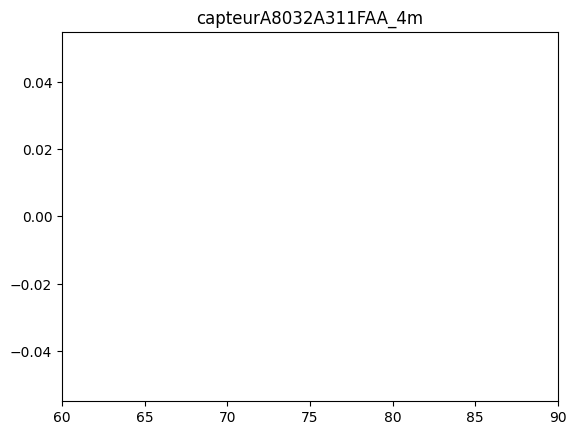

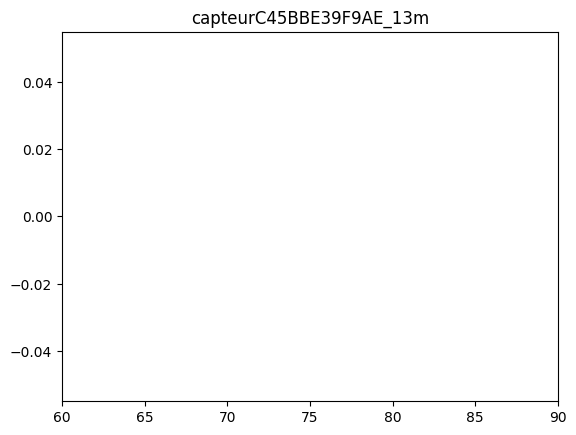

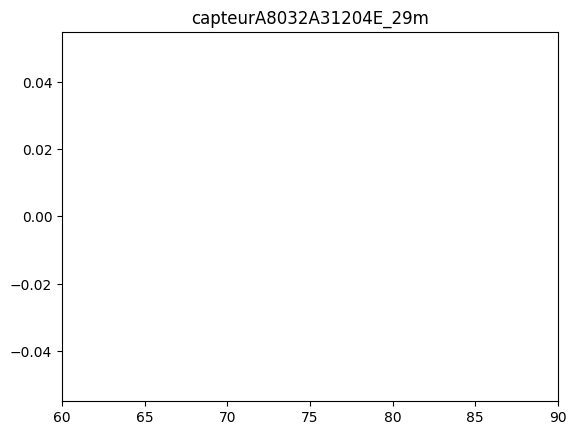

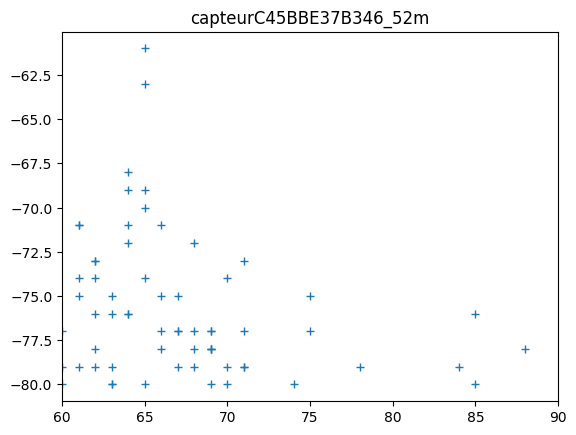

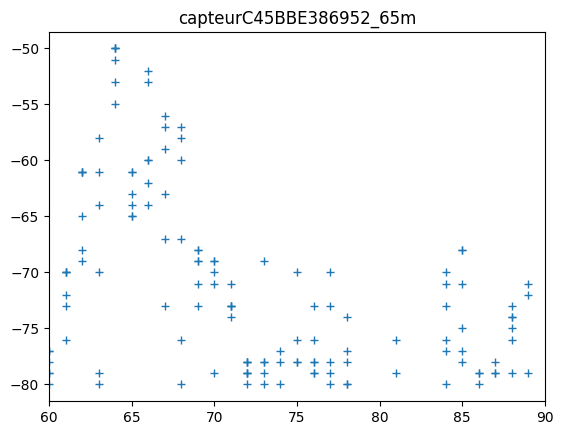

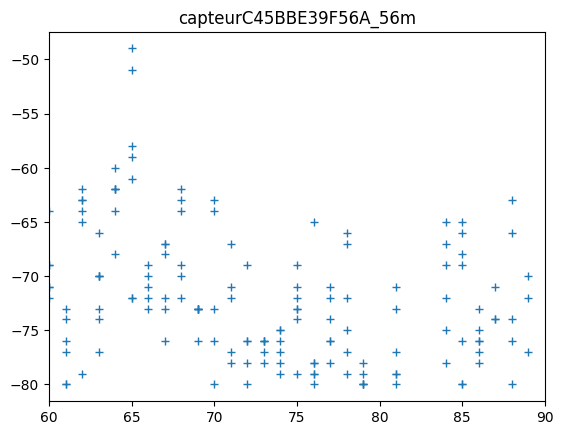

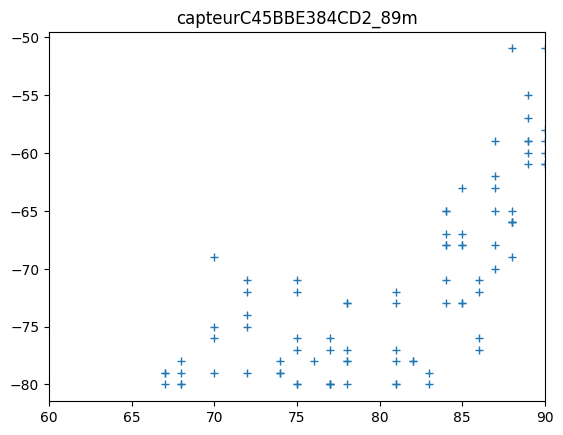

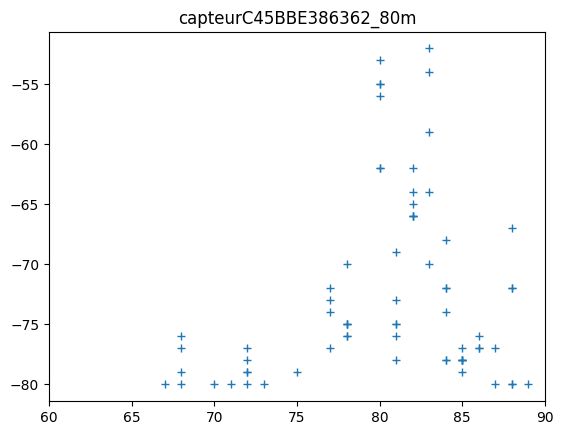

In [28]:
for d in capteurs:
    df3=df[df["macModule"]==d]
    plt.plot(df3["Position"],df3["rssi"],"+")
    plt.title("capteur"+str(d))
    plt.xlim(60,90)
    plt.show()

### Approche Max

In [36]:
import requests
def approche1(t1="08:53",t2="08:54"):

   url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/C77C2F92664E/2022-11-18%20"+t1+":00.000/2022-11-18%20"+t2+":00.000"

   reponse = requests.get(url)
   print(reponse)
   contenu = reponse.json()
   print(type(contenu))
   contenu['resultat']
   
   df_test = pd.DataFrame(contenu['resultat'])
   df_test["macModule"].unique()
   df_test["date"] = pd.to_datetime(df_test["timestamp"])
   df_test = df_test.sort_values('timestamp').reset_index()
   df_test['Time'] = pd.to_datetime(df_test['date']).dt.time
   df_test['hourMinute'] = df_test.date.dt.hour.astype(str) + 'h' + df_test.date.dt.minute.astype(str)
   df_test=df_test.drop(columns=["timestamp","date","Time","index"])

   my_map={'A8032A31204E':"A8032A31204E_29m", 'C45BBE37B346':"C45BBE37B346_52m", 'C45BBE39F9AE':"C45BBE39F9AE_13m", 'A8032A311FAA':"A8032A311FAA_4m",
       'C45BBE39F56A':"C45BBE39F56A_56m", 'C45BBE386952':"C45BBE386952_65m", 'C45BBE384CD2':"C45BBE384CD2_89m", 'C45BBE386362':"C45BBE386362_80m"}
   df_test["macModule"]=df_test["macModule"].map(my_map)

   my_map2={"A8032A31204E_29m":29,"C45BBE37B346_52m":52,"C45BBE39F9AE_13m":13, "A8032A311FAA_4m":4,
       "C45BBE39F56A_56m":56, "C45BBE386952_65m":65, "C45BBE384CD2_89m":89, "C45BBE386362_80m":80}
   df_test["Positions"]=df_test["macModule"].map(my_map2)
   INDEX=df_test["rssi"].sort_values(ascending=False).index
   sq=df_test.iloc[INDEX[0]]["Positions"]
   return sq